# Práctica: Redes Neuronales Convolucionales (CNN) en Python

En esta práctica aprenderás a construir y entrenar tu primera red neuronal convolucional (CNN) utilizando el conjunto de datos MNIST y Keras.  
A lo largo del notebook deberás completar los huecos en el código y responder a las preguntas que te irán guiando en el proceso.

## 1. Importa las librerías necesarias

Completa los imports para trabajar con Keras y manipular los datos.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.datasets import mnist
from keras.utils import to_categorical

## 2. Carga y visualiza los datos

Carga el dataset MNIST, observa cómo son las imágenes y reflexiona sobre su idoneidad para redes CNN.

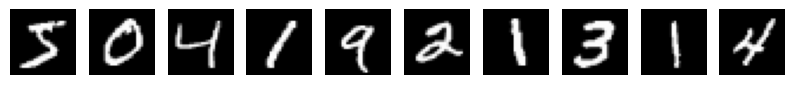

In [21]:
# Carga el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Visualiza 10 imágenes del dataset
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()

**Pregunta:**  
¿Qué observas sobre los datos? ¿Por qué puede ser útil este tipo de dataset para practicar con CNN?

*Los datos cargados se tratan de dibujos de números del 0 al 9. Este dataset puede ser especialmente útil para practicar con redes convolucionales ya que estas son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.*

## 3. Preprocesamiento

Normaliza los datos y prepara los conjuntos de entrenamiento y test.

In [22]:
# Normaliza los valores de los píxeles al rango [0,1]
x_train = x_train / 255.0 #255 por el rango de valores de píxeles
x_test = x_test / 255.0

#Añade una dimensión para canales (convierte (28,28) en (28,28,1))
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convierte las etiquetas a one-hot encoding (representar variables categoricas)
# como vectores binarios)
num_classes = np.max(y_train) + 1

y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

## 4. Construye tu primera CNN

Completa las capas de la red según las indicaciones.

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

# Añade una capa Conv2D:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

# Añade una capa de MaxPooling2D:
model.add(MaxPooling2D((2,2)))

# Añade otra capa Conv2D + MaxPooling2D
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))

# Aplana la salida
model.add(Flatten())

# Añade una capa Dense:
model.add(Dense(128, activation='relu'))

# Añade la capa de salida:
model.add(Dense(10, activation='softmax'))

# Muestra el resumen del modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

**Pregunta:**  
¿Para qué sirve cada tipo de capa en la CNN?


- *La primera capa Conv2D extrae características de la imagen.*
- *La segunda capa MaxPooling2D se encarga de la reducción de la dimensionalidad.*
- *Las otras dos capas hacen lo mismo.*
- *La capa flatten aplana en un vector unidimensional.*
- *La capa dense se conecta a todas de la capa anterior.*
- *Y la capa de salida produce la predicción del modelo.*


## 5. Compila y entrena la red

Configura el optimizador, la función de pérdida y entrena tu modelo.  
Utiliza validation_split=0.1 para observar el sobreajuste.

In [24]:
# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrena el modelo
history = model.fit(x_train, y_train, epochs=6, batch_size=128, validation_split=0.1)

Epoch 1/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8322 - loss: 0.5898 - val_accuracy: 0.9793 - val_loss: 0.0743
Epoch 2/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.9763 - loss: 0.0767 - val_accuracy: 0.9853 - val_loss: 0.0554
Epoch 3/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.9844 - loss: 0.0529 - val_accuracy: 0.9858 - val_loss: 0.0485
Epoch 4/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9884 - loss: 0.0383 - val_accuracy: 0.9890 - val_loss: 0.0397
Epoch 5/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9911 - loss: 0.0286 - val_accuracy: 0.9882 - val_loss: 0.0405
Epoch 6/6
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - accuracy: 0.9924 - loss: 0.0254 - val_accuracy: 0.9903 - val_loss: 0.0347


**Pregunta:**  
¿Qué significa cada uno de los parámetros usados en la compilación y el entrenamiento? ¿Por qué se usa un conjunto de validación?
*En la compilación se especifica el optimizador, la pérdida y las métricas. Se usa un conjunto de validación para poder saber si los resultados han tenido overfitting o no. De esta manera, sabemos qué tan bien puede generalizar nuestro modelo.*

## 6. Evalúa el modelo y analiza resultados

Comprueba la precisión en test y visualiza el entrenamiento.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9888 - loss: 0.0371
Test accuracy: 0.991100013256073


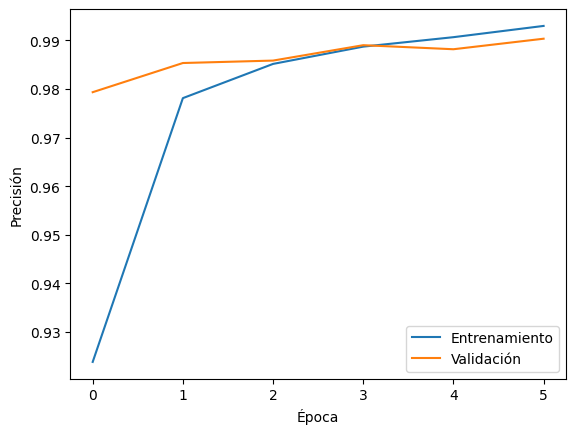

In [25]:
# Evalúa el modelo en el conjunto de test
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy:", test_acc)

# Visualiza la evolución de la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

**Pregunta:**  
¿Qué conclusiones sacas de las gráficas? ¿El modelo está sobreajustando?

*El entrenamiento a partir de la segunda/tercera época no cambia mucho y el tiene un poco de overfitting (aunque ambas curvas están aumentado). Habría overfitting si la de validación se estancara o disminuyera.*

## 7. Prueba el modelo y analiza errores

Selecciona imágenes mal clasificadas y obsérvalas.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


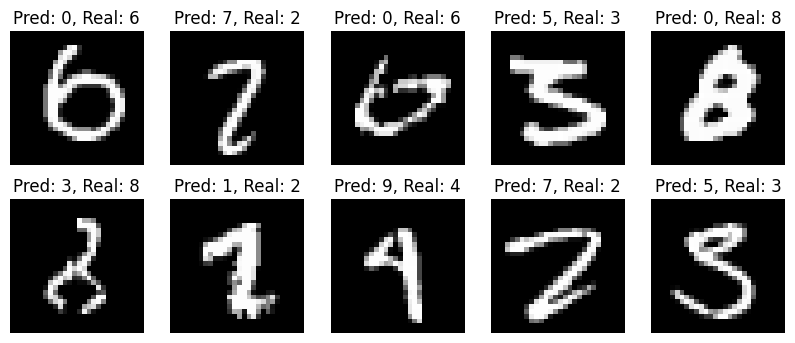

In [29]:
# Haz predicciones y analiza algunos errores
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Encuentra los índices donde hay errores
errors = np.where(y_pred_classes != y_true)[0]

# Visualiza algunos errores
plt.figure(figsize=(10, 4))
for i, idx in enumerate(errors[:10]):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[idx]}, Real: {y_true[idx]}")
    plt.axis('off')
plt.show()

**Pregunta:**  
¿Qué patrones ves en las imágenes mal clasificadas? ¿Qué podrías cambiar para mejorar la red?
*Las imágenes mal clasificadas son aquellas que son dificiles de reconocer y, para mejorar la red, podría entrenar con una mayor cantidad de este tipo de datos.*

## 8. (Opcional) Experimenta

- Cambia el número de capas, filtros o epochs.
- Prueba con otros optimizadores o funciones de activación.
- Observa cómo cambia la precisión y reflexiona sobre ello.